In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# import necessary modules 
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import cm

# load the data set
data = pd.read_csv('/content/gdrive/My Drive/DATASET_THESIS_UNDERGRAD/PUBLIC_PRIVATE_DATA_PRE_PROCESSED.csv')
data_sm = pd.read_csv('/content/gdrive/My Drive/DATASET_THESIS_UNDERGRAD/PUBLIC_PRIVATE_DATA_SMOTE_Public_Private.csv')

In [ ]:
data.insert(0, column = "PHQ_Result", value = (data.iloc[:, 0:9].sum(axis=1)))
data.drop(data.iloc[:, 1:10], axis='columns', inplace=True)
#PHQ9 Depression Severity

d = data['PHQ_Result']
ba_value = []
for i in range(len(d)):

  if d[i] >=1 and d[i] <=4:
    #Minimal Depression
    ba_value.append(1)
    
  elif d[i] >=5 and d[i] <=9:
    #Mild Depression
    ba_value.append(2)

  elif d[i] >=10 and d[i] <=14:
    #Moderate Depression
    ba_value.append(3)

  elif d[i] >=15 and d[i] <=19:
    #Moderately Severe Depression
    ba_value.append(4)

  else:
    #Severe Depression
    ba_value.append(5)

data['PHQ_Result'] = ba_value
data

,PHQ_Result,Age,Sex,Area,Residence,Gadget_Use_Hour,Social_Media_Hour,Study_Hour,Smoke_Habit,Drugs_Intake,Relationship_With_Family,Romantic_Relationship,Number_Of_Friends,Frequency_Of_Going_Out,Public_or_Private,University_In_Dhaka,Choice_Of_Subject,Subject_Likeliness,University_Facility,Session_Jam,Tuition_Fee_Struggle,University_Subject_Criticism,Academic_Stress,Faculty_Cooperation,Classmate_Cooperation,Extra_Curricular_Activity,Bullied,Sexual_Harrassment
0,5,2,2,1,1,3,3,1,2,2,1,3,2,1,2,1,1,1,1,2,3,4,4,5,3,1,3,1
1,1,2,1,1,1,2,2,1,3,2,1,2,4,2,2,2,1,2,2,2,3,1,5,2,4,2,1,1
2,3,2,1,1,1,3,2,1,3,2,1,3,2,1,2,1,1,1,1,2,3,3,4,3,3,1,3,1
3,2,2,1,1,1,3,2,2,2,2,1,3,3,1,2,1,1,1,1,2,3,2,4,3,4,1,3,1
4,2,1,1,1,2,3,2,1,2,2,1,2,4,2,2,1,1,1,2,2,2,1,4,4,5,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,5,1,2,1,3,1,1,1,3,2,1,2,4,1,1,1,2,1,1,2,3,1,3,4,4,1,3,1
470,3,1,1,1,1,3,1,1,3,2,1,2,3,3,1,1,1,1,2,2,1,2,5,2,4,1,3,1
471,5,2,1,1,1,2,1,1,1,1,2,2,4,2,1,1,1,2,2,2,3,2,4,2,4,5,1,2
472,5,1,1,1,1,3,1,4,3,2,2,2,3,1,2,1,3,2,1,2,2,3,4,4,3,4,3,1


In [ ]:
X = data.drop(['PHQ_Result'], axis='columns')
y = data['PHQ_Result']


from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


ACCURACY OF THE MODEL:  0.38461538461538464


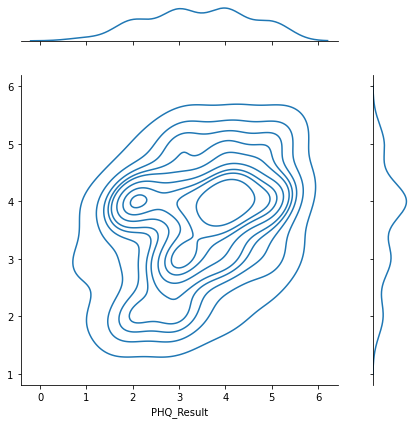

In [ ]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

plt = sns.jointplot(x= y_test,y=y_pred,kind= 'kde', height=6, space=1)

plt.savefig('RF_Accu.png')
!cp RF_Accu.png "/content/gdrive/My Drive/DATASET_THESIS_UNDERGRAD/"

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.37      0.36      0.36        28
           3       0.44      0.33      0.38        42
           4       0.36      0.40      0.38        43
           5       0.31      0.38      0.34        26

    accuracy                           0.36       143
   macro avg       0.30      0.29      0.29       143
weighted avg       0.37      0.36      0.36       143



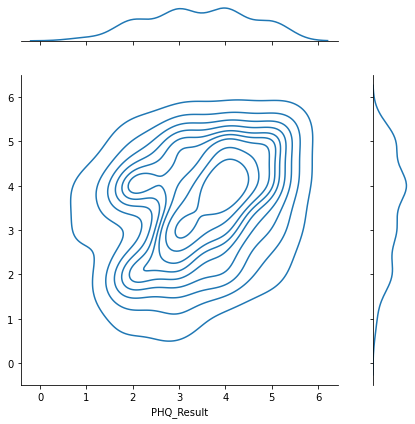

In [ ]:
# logistic regression object
lr = LogisticRegression(max_iter=1000)
  
# train the model on train set
lr.fit(X_train, y_train.ravel())
  
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

plt = sns.jointplot(x= y_test,y=predictions,data= y_test,kind= 'kde', height=6, space=1)

plt.savefig('LR_Accu.png')
!cp LR_Accu.png "/content/gdrive/My Drive/DATASET_THESIS_UNDERGRAD/"

In [ ]:
data_sm

data_sm.insert(0, column = "PHQ_Result", value = (data_sm.iloc[:, 0:9].sum(axis=1)))
data_sm.drop(data_sm.iloc[:, 1:10], axis='columns', inplace=True)
#PHQ9 Depression Severity

d = data_sm['PHQ_Result']
ba_value = []
for i in range(len(d)):

  if d[i] >=1 and d[i] <=4:
    #Minimal Depression
    ba_value.append(1)
    
  elif d[i] >=5 and d[i] <=9:
    #Mild Depression
    ba_value.append(2)

  elif d[i] >=10 and d[i] <=14:
    #Moderate Depression
    ba_value.append(3)

  elif d[i] >=15 and d[i] <=19:
    #Moderately Severe Depression
    ba_value.append(4)

  else:
    #Severe Depression
    ba_value.append(5)

data_sm['PHQ_Result'] = ba_value
data_sm

,PHQ_Result,Age,Sex,Residence,Gadget_Use_Hour,Social_Media_Hour,Study_Hour,Smoke_Habit,Drugs_Intake,Relationship_With_Family,Romantic_Relationship,Number_Of_Friends,Frequency_Of_Going_Out,Choice_Of_Subject,Subject_Likeliness,University_Facility,Session_Jam,Tuition_Fee_Struggle,University_Subject_Criticism,Academic_Stress,Faculty_Cooperation,Classmate_Cooperation,Extra_Curricular_Activity,Bullied,Sexual_Harrassment,University_out_of_Dhaka,Rural,Private
0,5,2,2,1,3,3,1,2,2,1,3,2,1,1,1,1,2,3,4,4,5,3,1,3,1,0,0,1
1,1,2,1,1,2,2,1,3,2,1,2,4,2,1,2,2,2,3,1,5,2,4,2,1,1,1,0,1
2,3,2,1,1,3,2,1,3,2,1,3,2,1,1,1,1,2,3,3,4,3,3,1,3,1,0,0,1
3,2,2,1,1,3,2,2,2,2,1,3,3,1,1,1,1,2,3,2,4,3,4,1,3,1,0,0,1
4,2,1,1,2,3,2,1,2,2,1,2,4,2,1,1,2,2,2,1,4,4,5,5,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103,2,2,1,1,3,2,1,1,2,1,2,2,1,1,1,1,2,3,1,4,3,3,1,3,1,0,0,1
2104,3,1,1,1,2,2,1,3,2,1,2,2,1,1,1,2,2,3,1,4,3,4,3,3,1,0,0,1
2105,3,1,1,1,2,1,1,3,1,2,3,2,1,1,1,1,2,3,2,4,3,4,5,3,1,0,0,1
2106,2,1,1,2,2,2,1,2,2,1,2,4,2,1,1,1,2,2,1,4,4,4,4,3,1,0,0,1


In [ ]:
X = data_sm.drop(['PHQ_Result'], axis='columns')
y = data_sm['PHQ_Result']


from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


ACCURACY OF THE MODEL:  0.7456556082148499


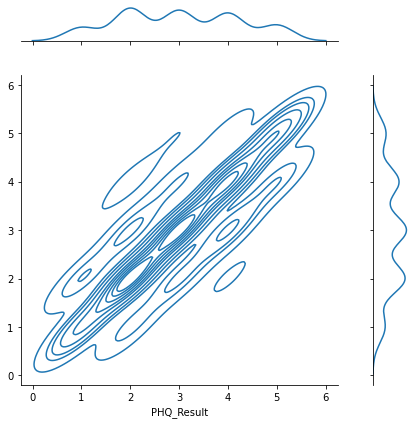

In [ ]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

plt = sns.jointplot(x= y_test,y=y_pred,kind= 'kde', height=6, space=1)

plt.savefig('RF_Accu_sm.png')
!cp RF_Accu_sm.png "/content/gdrive/My Drive/DATASET_THESIS_UNDERGRAD/"

              precision    recall  f1-score   support

           1       0.64      0.49      0.56        71
           2       0.51      0.58      0.54       172
           3       0.40      0.39      0.39       160
           4       0.55      0.57      0.56       146
           5       0.53      0.46      0.49        84

    accuracy                           0.50       633
   macro avg       0.52      0.50      0.51       633
weighted avg       0.51      0.50      0.50       633



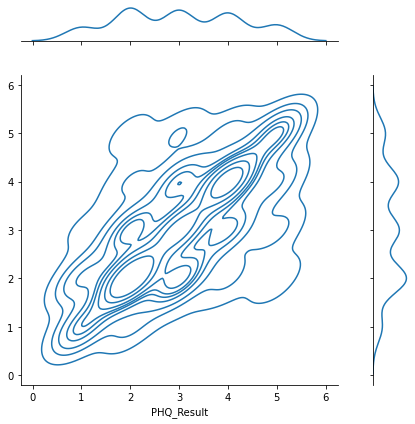

In [ ]:
# logistic regression object
lr = LogisticRegression(max_iter=1000)
  
# train the model on train set
lr.fit(X_train, y_train.ravel())
  
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

plt = sns.jointplot(x= y_test,y=predictions,data= y_test,kind= 'kde', height=6, space=1)

plt.savefig('LR_Accu_sm.png')
!cp LR_Accu_sm.png "/content/gdrive/My Drive/DATASET_THESIS_UNDERGRAD/"